In [418]:
#%%
import sys, os
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta
import matplotlib.dates as mdates
import pandas as pd
import seaborn as sns
import pickle
import json
from util import (
    load_GaMMA_catalog,
    load_scsn,
    load_Ross2019,
    load_Shelly2020,
    load_Liu2020,
    load_eqnet_catalog,
    filter_catalog,
    calc_detection_performance,
    calc_time_loc_error,
    plot_loc_error,
    timestamp,
    calc_time_mag_error,
)

sns.set_theme()


In [419]:
#%%
dates =[f"2019-07-{x:02d}" for x in range(4, 11)]
# dates =[f"2019-07-{x:02d}" for x in range(4, 10)]
start_datetime = datetime.fromisoformat(dates[0])
end_datetime = datetime.fromisoformat(dates[-1])
hours = range(24)
xmin = 0
xmax = 111.2
ymin = xmin
ymax = xmax

if not os.path.exists("figures"):
    os.makedirs("figures")

In [420]:
t_gamma, xyz_gamma, mag_gamma, catalog_gamma = filter_catalog(load_GaMMA_catalog("merged_catalog.csv"), start_datetime, end_datetime, xmin, xmax, ymin, ymax)
t_eqnet, xyz_eqnet, mag_eqnet, catalog_eqnet = filter_catalog(load_eqnet_catalog("2019-07-04-2019-07-08-threshold050.txt"), start_datetime, end_datetime, xmin, xmax, ymin, ymax)
t_scsn, xyz_scsn, mag_scsn, catalog_scsn = filter_catalog(load_scsn(), start_datetime, end_datetime, xmin, xmax, ymin, ymax)
t_ross2019, xyz_ross2019, mag_ross2019, catalog_ross2019 = filter_catalog(load_Ross2019(), start_datetime, end_datetime, xmin, xmax, ymin, ymax)
t_liu2020, xyz_liu2020, mag_liu2020, catalog_liu2020 = filter_catalog(load_Liu2020(), start_datetime, end_datetime, xmin, xmax, ymin, ymax)
t_shelly2020, xyz_shelly2020, mag_shelly2020, catalog_shelly2020 = filter_catalog(load_Shelly2020(), start_datetime, end_datetime, xmin, xmax, ymin, ymax)

t_pred = t_eqnet
xyz_pred = xyz_eqnet

t_pred = t_gamma
xyz_pred = xyz_gamma
mag_pred = mag_gamma

Filtered catalog 2019-07-04 00:00:00-2019-07-10 00:00:00: 34791 events
Filtered catalog 2019-07-04 00:00:00-2019-07-10 00:00:00: 11739 events
Filtered catalog 2019-07-04 00:00:00-2019-07-10 00:00:00: 9873 events
Filtered catalog 2019-07-04 00:00:00-2019-07-10 00:00:00: 29384 events
Filtered catalog 2019-07-04 00:00:00-2019-07-10 00:00:00: 15421 events
Filtered catalog 2019-07-04 00:00:00-2019-07-10 00:00:00: 16778 events


In [403]:
picks_file = "merged_picks.csv"
picks = pd.read_csv(picks_file, delimiter="\t")
picks["time"] = picks["timestamp"].apply(lambda x: datetime.fromisoformat(x))
stations = pd.read_csv("stations.csv", delimiter="\t")
selected_gamma = pd.read_csv("merged_catalog.csv", delimiter="\t")
selected_gamma["time"] = selected_gamma["time"].apply(lambda x: datetime.fromisoformat(x))


In [404]:
# starttime = datetime.fromisoformat("2019-07-04T19:11:00")
# endtime = datetime.fromisoformat("2019-07-04T19:20:30")
# starttime = datetime.fromisoformat("2019-07-04T17:39:59")
# endtime = datetime.fromisoformat("2019-07-04T17:48:01")
# starttime = datetime.fromisoformat("2019-07-04T18:00:00")
# endtime = datetime.fromisoformat("2019-07-04T18:07:00")
# starttime = datetime.fromisoformat("2019-07-07T00:00:00")
# endtime = datetime.fromisoformat("2019-07-07T00:08:00")
starttime = datetime.fromisoformat("2019-07-07T23:59:58")
# starttime = datetime.fromisoformat("2019-07-08T00:01:59")
# endtime = datetime.fromisoformat("2019-07-08T00:08:01")
endtime = datetime.fromisoformat("2019-07-08T00:06:18")
# starttime = datetime.fromisoformat("2019-07-06T03:19:53")
# endtime = datetime.fromisoformat("2019-07-06T03:29:53")
selected_picks = picks[ (picks["time"] > starttime) & (picks["time"] < endtime) ]
selected_picks_full = pd.merge(left=selected_picks, right=stations, left_on="id", right_on="station", how="left")
selected_eqnet = selected_gamma[ (selected_gamma["time"] > starttime) & (selected_gamma["time"] < endtime) ]
selected_scsn = catalog_scsn[ (catalog_scsn["time"] > starttime) & (catalog_scsn["time"] < endtime) ]
selected_ross2019 = catalog_ross2019[ (catalog_ross2019["time"] > starttime) & (catalog_ross2019["time"] < endtime) ]

In [405]:
selected_gamma["index"] = selected_gamma["event_idx"].apply(str) + selected_gamma["file_index"].apply(str)
selected_picks_full["index"] = selected_picks_full["event_idx"].apply(str) + selected_picks_full["file_index"].apply(str)

In [415]:
np.array(selected_ross2019["time"])


18240   2019-07-08 00:00:20.840
18241   2019-07-08 00:01:42.034
19481   2019-07-08 00:00:48.088
19482   2019-07-08 00:00:55.970
19483   2019-07-08 00:01:11.317
19484   2019-07-08 00:02:05.028
19485   2019-07-08 00:02:13.998
19486   2019-07-08 00:02:28.368
19487   2019-07-08 00:02:44.530
19488   2019-07-08 00:02:53.958
19489   2019-07-08 00:03:12.352
19490   2019-07-08 00:03:50.029
19491   2019-07-08 00:04:05.205
19492   2019-07-08 00:04:19.820
19493   2019-07-08 00:04:33.158
19494   2019-07-08 00:04:49.896
19495   2019-07-08 00:05:04.670
19496   2019-07-08 00:05:22.290
19497   2019-07-08 00:05:32.470
19498   2019-07-08 00:05:49.625
19499   2019-07-08 00:06:08.600
19500   2019-07-08 00:06:17.294
Name: time, dtype: datetime64[ns]

In [416]:
selected_gamma

,time,magnitude,longitude,latitude,depth(m),covariance,event_idx,file_index,index
21061,2019-07-08 00:00:02.602,0.842,-117.520,35.666,16099.143,"0.309,0.348,0.009",698,0,6980
21062,2019-07-08 00:00:20.390,1.268,-117.670,35.869,12271.116,"0.295,0.210,0.005",694,0,6940
21063,2019-07-08 00:00:36.266,0.732,-117.655,35.928,9.582,"1.087,0.309,-0.115",695,0,6950
21064,2019-07-08 00:00:38.761,0.882,-117.469,35.614,8291.629,"0.457,0.442,0.049",697,0,6970
21065,2019-07-08 00:00:49.834,0.942,-117.653,35.955,0.000,"1.288,0.657,0.527",696,0,6960
21066,2019-07-08 00:01:18.823,1.336,-117.400,35.760,0.000,"5.370,0.477,-0.116",699,0,6990
21067,2019-07-08 00:01:20.639,1.477,-117.583,35.986,8376.622,"0.257,0.154,0.007",702,0,7020
21068,2019-07-08 00:01:41.503,1.575,-117.685,35.887,11930.549,"0.239,0.167,0.005",700,0,7000
21069,2019-07-08 00:01:57.554,1.171,-117.929,36.208,0.000,"2.056,0.403,-0.043",701,0,7010
21070,2019-07-08 00:02:06.372,1.024,-117.684,35.943,6764.350,"0.218,0.237,0.021",703,0,7030


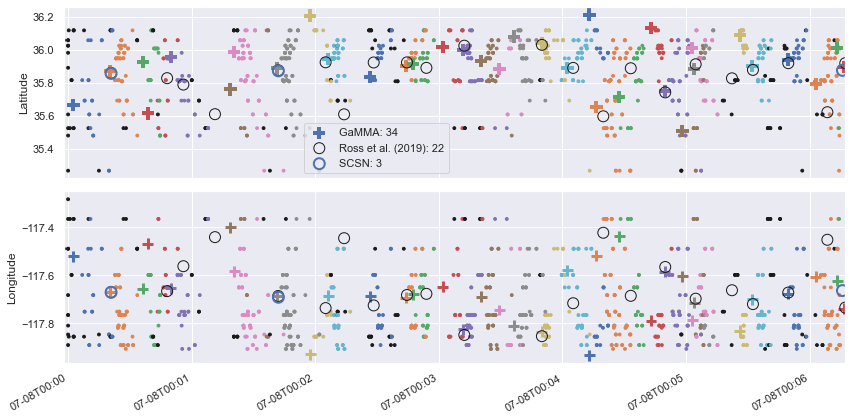

In [428]:
plt.figure(figsize=(12, 6))
color = {}

selected_eqnet = selected_eqnet.sort_values(by="time")
for i, x in enumerate(selected_eqnet["index"]):
    color[x] = f"C{i}"
for i, x in enumerate(selected_picks_full["index"]):
    if x not in color:
        color[x] = "k"

plt.subplot(2, 1, 1)
plt.scatter(selected_picks_full["time"], selected_picks_full["latitude"], s=8, c=[color[x] for x in selected_picks_full["index"]], linewidths=1, alpha=1.0)
plt.scatter(selected_eqnet["time"], selected_eqnet["latitude"], s=150, c=[color[x] for x in selected_eqnet["index"]], marker="+", linewidths=4, alpha=1.0, label=f"GaMMA: {len(selected_eqnet['time'])}")
plt.scatter(selected_ross2019["time"], selected_ross2019["latitude"], s=120, edgecolors="k", facecolors="none", marker="o", linewidths=1, alpha=1.0, label=f"Ross et al. (2019): {len(selected_ross2019['time'])}")
plt.scatter(selected_scsn["time"], selected_scsn["latitude"], s=120, edgecolors="b", facecolors="none", marker="o", linewidths=2,  alpha=1.0, label=f"SCSN: {len(selected_scsn['time'])}")
plt.gca().autoscale(enable=True, axis='x', tight=True)
plt.gca().set_xticklabels([])
plt.ylabel("Latitude")
plt.legend(bbox_to_anchor=(0.3, 0), loc='lower left', ncol=1)
plt.subplot(2, 1, 2)
plt.scatter(selected_picks_full["time"], selected_picks_full["longitude"], s=8, c=[color[x] for x in selected_picks_full["index"]], linewidths=1, alpha=1.0)
plt.scatter(selected_eqnet["time"], selected_eqnet["longitude"], s=120, c=[color[x] for x in selected_eqnet["index"]], marker="+", linewidths=3, alpha=1.0, label=f"GaMMA:{len(selected_eqnet['time'])}")
plt.scatter(selected_ross2019["time"], selected_ross2019["longitude"], s=120, edgecolors="k", facecolors="none", marker="o", linewidths=1, alpha=1.0, label=f"Ross et al. (2019):{len(selected_ross2019['time'])}")
plt.scatter(selected_scsn["time"], selected_scsn["longitude"], s=120, edgecolors="b", facecolors="none", marker="o", linewidths=2, alpha=1.0, label=f"SCSN: {len(selected_scsn['time'])}")
plt.ylabel("Longitude")

plt.gca().autoscale(enable=True, axis='x', tight=True)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%dT%H:%M'))
plt.gcf().autofmt_xdate()
plt.tight_layout()
# plt.legend()

plt.savefig("figures/example.png", bbox_inches="tight", dpi=300)
plt.savefig("figures/example.pdf", bbox_inches="tight")

In [422]:
result_label="GaMMA"
catalog_label="SCSN"
# catalog_label="IRIS"
catalog_file = "merged_catalog.csv"
picks_file = "merged_picks.csv"

dir_name = "./"
if not os.path.exists(dir_name):
    os.mkdir(dir_name)
root_dir = lambda x: os.path.join(dir_name, x)

with open(root_dir("config.json"), "r") as fp:
    config = json.load(fp)
stations = pd.read_csv(root_dir("stations.csv"), delimiter="\t")
# events = pd.read_csv(root_dir("events.csv"), delimiter="\t")
# events["time"] = events["time"].apply(lambda x: datetime.strptime(x, "%Y-%m-%dT%H:%M:%S.%f"))
# catalog = pd.read_csv(root_dir(catalog_file), delimiter="\t")
# catalog["time"] = catalog["time"].apply(lambda x: datetime.strptime(x, "%Y-%m-%dT%H:%M:%S.%f"))
events = catalog_scsn
catalog = catalog_gamma
catalog["covariance"] = catalog["covariance"].apply(lambda x: [float(i) for i  in x.split(",")])
marker_size = 0.2
bins = min(len(catalog["time"])//50 + 10, 50)

# catalog = catalog_eqnet
marker_size = 0.2
bins = min(len(catalog["time"])//50 + 10, 50)


In [7]:
config["endtime"] = dates[-1]

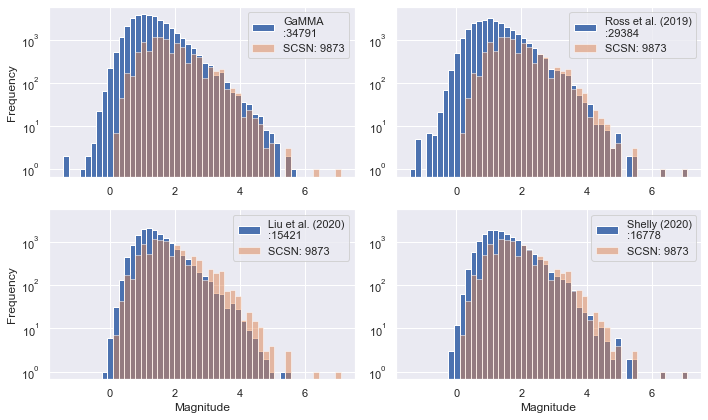

In [8]:
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
plt.hist(mag_gamma, bins=50, range=[np.min([np.min(mag_gamma), np.min(mag_scsn)]), np.max([np.max(mag_gamma), np.max(mag_scsn)])], label=f"GaMMA\n:{len(mag_gamma)}")
plt.hist(mag_scsn, bins=50, range=[np.min([np.min(mag_gamma), np.min(mag_scsn)]), np.max([np.max(mag_gamma), np.max(mag_scsn)])], alpha=0.5, label=f"SCSN: {len(mag_scsn)}")
plt.gca().set_yscale('log')
ylim = plt.ylim()
plt.legend()
plt.ylabel("Frequency")
plt.subplot(2, 2, 2)
plt.hist(mag_ross2019, bins=50, range=[np.min([np.min(mag_gamma), np.min(mag_scsn)]), np.max([np.max(mag_gamma), np.max(mag_scsn)])], label=f"Ross et al. (2019)\n:{len(mag_ross2019)}")
plt.hist(mag_scsn, bins=50, range=[np.min([np.min(mag_gamma), np.min(mag_scsn)]), np.max([np.max(mag_gamma), np.max(mag_scsn)])], alpha=0.5, label=f"SCSN: {len(mag_scsn)}")
plt.gca().set_yscale('log')
plt.ylim(ylim)
plt.legend()
plt.subplot(2, 2, 3)
plt.hist(mag_liu2020, bins=50, range=[np.min([np.min(mag_gamma), np.min(mag_scsn)]), np.max([np.max(mag_gamma), np.max(mag_scsn)])], label=f"Liu et al. (2020)\n:{len(mag_liu2020)}")
plt.hist(mag_scsn, bins=50, range=[np.min([np.min(mag_gamma), np.min(mag_scsn)]), np.max([np.max(mag_gamma), np.max(mag_scsn)])], alpha=0.5, label=f"SCSN: {len(mag_scsn)}")
plt.gca().set_yscale('log')
plt.ylim(ylim)
plt.legend()
plt.xlabel("Magnitude")
plt.ylabel("Frequency")
plt.subplot(2, 2, 4)
plt.hist(mag_shelly2020, bins=50, range=[np.min([np.min(mag_gamma), np.min(mag_scsn)]), np.max([np.max(mag_gamma), np.max(mag_scsn)])], label=f"Shelly (2020)\n:{len(mag_shelly2020)}")
plt.hist(mag_scsn, bins=50, range=[np.min([np.min(mag_gamma), np.min(mag_scsn)]), np.max([np.max(mag_gamma), np.max(mag_scsn)])], alpha=0.5,  label=f"SCSN: {len(mag_scsn)}")
plt.gca().set_yscale('log')
plt.ylim(ylim)
plt.legend()
plt.xlabel("Magnitude")
plt.tight_layout()
plt.savefig("figures/compare_magnitude.png", bbox_inches="tight", dpi=300)
plt.savefig("figures/compare_magnitude.pdf", bbox_inches="tight")

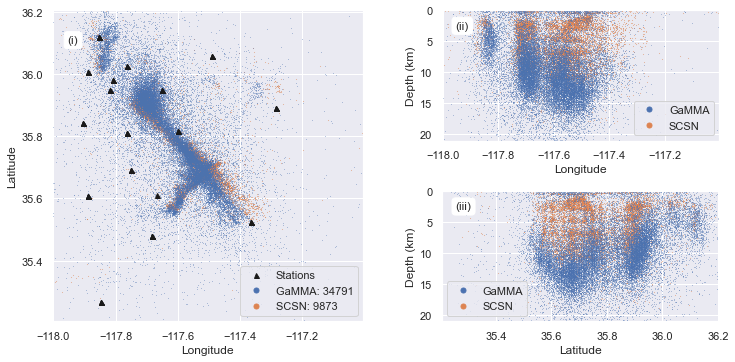

In [9]:
## GaMMA
marker_size = 0.4
alpha = 0.4
plot_depth = True

## EQNet
# marker_size = 0.8
# alpha = 0.4
# plot_depth = False

fig = plt.figure(figsize=plt.rcParams["figure.figsize"]*np.array([1.8,1.3]))
box = dict(boxstyle='round', facecolor='white', alpha=1)
text_loc = [0.05, 0.92]
if plot_depth:
    grd = fig.add_gridspec(ncols=2, nrows=2, width_ratios=[1.5, 1], height_ratios=[1,1])
    fig.add_subplot(grd[:, 0])
plt.scatter(events["longitude"], events["latitude"], s=marker_size, c="C1", linewidths=marker_size, alpha=0.5, rasterized=True)
plt.scatter(catalog["longitude"], catalog["latitude"], s=marker_size, c="C0", linewidths=marker_size, alpha=alpha, rasterized=True)
plt.plot(stations["longitude"], stations["latitude"], 'k^', markersize=5, alpha=1.0, label="Stations")
plt.axis("scaled")
plt.xlim(np.array(config["xlim_degree"]))#+np.array([0.2,-0.27]))
plt.ylim(np.array(config["ylim_degree"]))#+np.array([0.2,-0.27]))
plt.ylabel("Latitude")
plt.xlabel("Longitude")
plt.gca().set_prop_cycle(None)
plt.plot(config["xlim_degree"][0]-10, config["ylim_degree"][0]-10, '.', c="C0", markersize=10, label=f"{result_label}: {len(catalog['time'])}")
plt.plot(config["xlim_degree"][0]-10, config["ylim_degree"][0]-10, '.', c="C1", markersize=10, label=f"{catalog_label}: {len(events['time'])}")
plt.legend(loc="lower right")
if plot_depth:
    plt.text(text_loc[0], text_loc[1], '(i)', horizontalalignment='left', verticalalignment="top", 
            transform=plt.gca().transAxes, fontweight="normal", bbox=box)

if plot_depth:
    fig.add_subplot(grd[0, 1])
    plt.scatter(events["longitude"], events["depth(m)"]/1e3, s=marker_size, c="C1", linewidths=marker_size, alpha=0.5, rasterized=True)
    plt.scatter(catalog["longitude"], catalog["depth(m)"]/1e3, s=marker_size, c="C0", linewidths=marker_size, alpha=alpha, rasterized=True)
    # plt.axis("scaled")
    plt.xlim(np.array(config["xlim_degree"]))#+np.array([0.2,-0.27]))
    plt.ylim([0,21])
    # plt.ylim(bottom=0, top=41)
    plt.gca().invert_yaxis()
    plt.xlabel("Longitude")
    plt.ylabel("Depth (km)")
    plt.gca().set_prop_cycle(None)
    plt.plot(config["xlim_degree"][0]-10, 31, '.', c="C0", markersize=10, label=f"{result_label}")
    plt.plot(31, 31, '.', c="C1", markersize=10, label=f"{catalog_label}")
    plt.legend(loc="lower right")
    plt.text(text_loc[0], text_loc[1], '(ii)', horizontalalignment='left', verticalalignment="top", 
            transform=plt.gca().transAxes, fontweight="normal", bbox=box)

    fig.add_subplot(grd[1, 1])
    plt.scatter(events["latitude"], events["depth(m)"]/1e3, s=marker_size, c="C1", linewidths=marker_size, alpha=0.5, rasterized=True)
    plt.scatter(catalog["latitude"], catalog["depth(m)"]/1e3, s=marker_size, c="C0", linewidths=marker_size, alpha=alpha, rasterized=True)
    # plt.axis("scaled")
    plt.xlim(np.array(config["ylim_degree"]))#+np.array([0.2,-0.27]))
    plt.ylim([0,21])
    # plt.ylim(bottom=0, top=41)
    plt.gca().invert_yaxis()
    plt.xlabel("Latitude")
    plt.ylabel("Depth (km)")
    plt.gca().set_prop_cycle(None)
    plt.plot(config["ylim_degree"][0]-10, 31, '.', c="C0", markersize=10, label=f"{result_label}")
    plt.plot(31, 31, '.', c="C1", markersize=10, label=f"{catalog_label}")
    plt.legend(loc="lower left")
    plt.tight_layout()
    plt.text(text_loc[0], text_loc[1], '(iii)', horizontalalignment='left', verticalalignment="top", 
            transform=plt.gca().transAxes, fontweight="normal", bbox=box)

plt.savefig(root_dir("figures/earthquake_location.png"), bbox_inches="tight", dpi=300)
plt.savefig(root_dir("figures/earthquake_location.pdf"), bbox_inches="tight", dpi=300)
plt.show()

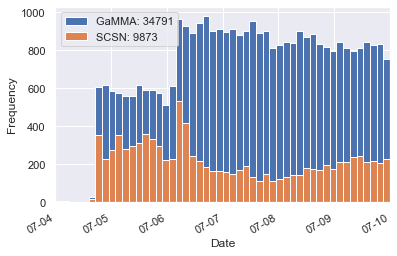

In [425]:
plt.figure()
plt.hist(np.array(catalog["time"]).astype("datetime64[ms]"), range=(config["starttime"], config["endtime"]), bins=bins, label=f"{result_label}: {len(catalog['time'])}")
plt.hist(np.array(events["time"]).astype("datetime64[ms]"), range=(config["starttime"], config["endtime"]), bins=bins, label=f"{catalog_label}: {len(events['time'])}")
plt.ylabel("Frequency")
plt.xlabel("Date")
# plt.yscale("log")
plt.gca().autoscale(enable=True, axis='x', tight=True)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.gcf().autofmt_xdate()
plt.legend()
plt.savefig(root_dir("figures/earthquake_number.png"), bbox_inches="tight", dpi=300)
plt.savefig(root_dir("figures/earthquake_number.pdf"), bbox_inches="tight")
plt.show()

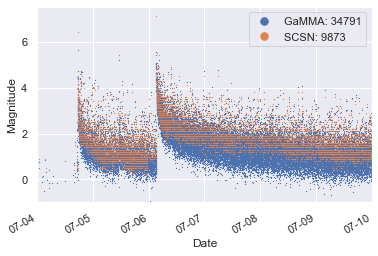

In [426]:
marker_size = 0.5
plt.figure()
plt.scatter(np.array(catalog["time"]).astype("datetime64[ms]"), catalog["magnitude"], s=marker_size, linewidths=marker_size, alpha=1.0, rasterized=True)
plt.scatter(np.array(events["time"]).astype("datetime64[ms]"), events["magnitude"], s=marker_size, linewidths=marker_size, alpha=1.0, rasterized=True)
plt.xlim(config["starttime"], config["endtime"])
# plt.ylim(top=events["magnitude"].max())
ylim = plt.ylim(bottom=-1)
xlim = plt.xlim()
plt.ylabel("Magnitude")
plt.xlabel("Date")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.gcf().autofmt_xdate()
plt.gca().set_prop_cycle(None)
plt.plot(datetime.fromisoformat(config["starttime"]), -10, '.', markersize=15, alpha=1.0, label=f"{result_label}: {len(catalog['magnitude'])}")
plt.plot(datetime.fromisoformat(config["starttime"]), -10, '.', markersize=15, alpha=1.0, label=f"{catalog_label}: {len(events['magnitude'])}")
plt.legend()
plt.xlim(xlim)
plt.ylim(ylim)
# plt.grid()
plt.savefig(root_dir("figures/earthquake_magnitude_time.png"), bbox_inches="tight", dpi=300)
plt.savefig(root_dir("figures/earthquake_magnitude_time.pdf"), bbox_inches="tight", dpi=300)
plt.show();

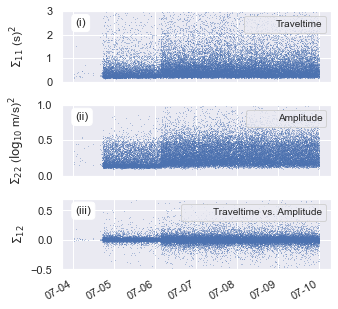

In [427]:
marker_size = 0.2

covariance = np.array(catalog["covariance"].to_list())

fig = plt.figure(figsize=plt.rcParams["figure.figsize"]*np.array([0.8,1.1]))
box = dict(boxstyle='round', facecolor='white', alpha=1)
text_loc = [0.05, 0.90]
plt.subplot(311)
plt.scatter(np.array(catalog["time"]).astype("datetime64[ms]"), covariance[:,0], s=marker_size, linewidths=marker_size, label="Traveltime", rasterized=True)
plt.ylim([0, 3])
plt.ylabel(r"$\Sigma_{11}$ (s)$^2$")
plt.legend(loc="upper right", fontsize="small")
plt.text(text_loc[0], text_loc[1], '(i)', horizontalalignment='left', verticalalignment="top", 
         transform=plt.gca().transAxes, fontweight="normal", bbox=box)
plt.subplot(312)
plt.scatter(np.array(catalog["time"]).astype("datetime64[ms]"), covariance[:,1], s=marker_size, linewidths=marker_size, label="Amplitude", rasterized=True)
plt.ylim([0, 1])
plt.ylabel(r"$\Sigma_{22}$ ($\log_{10}$ m/s)$^2$")
plt.legend(loc="upper right", fontsize="small")
plt.text(text_loc[0], text_loc[1], '(ii)', horizontalalignment='left', verticalalignment="top", 
         transform=plt.gca().transAxes, fontweight="normal", bbox=box)
plt.subplot(313)
plt.scatter(np.array(catalog["time"]).astype("datetime64[ms]"), covariance[:,2], s=marker_size, linewidths=marker_size, label="Traveltime vs. Amplitude", rasterized=True)
plt.ylabel(r"$\Sigma_{12}$")
plt.ylim([-0.5, 0.7])
plt.legend(loc="upper right", fontsize="small")
plt.text(text_loc[0], text_loc[1], '(iii)', horizontalalignment='left', verticalalignment="top", 
         transform=plt.gca().transAxes, fontweight="normal", bbox=box)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.gcf().autofmt_xdate()
# plt.suptitle(r"Covariance Matrix ($\Sigma$) Coefficients")
plt.tight_layout()
plt.gcf().align_labels()
plt.savefig(root_dir("figures/covariance.png"), bbox_inches="tight", dpi=300)
plt.savefig(root_dir("figures/covariance.pdf"), bbox_inches="tight", dpi=300)
plt.show();

In [13]:
#%% plot error distribution
time_threshold = 5
err_time, err_xyz, err_xy, _, _, t = calc_time_loc_error(t_pred, xyz_pred, t_scsn, xyz_scsn, time_threshold)

['2019-07-04 00:00:00', '2019-07-10 00:00:00']


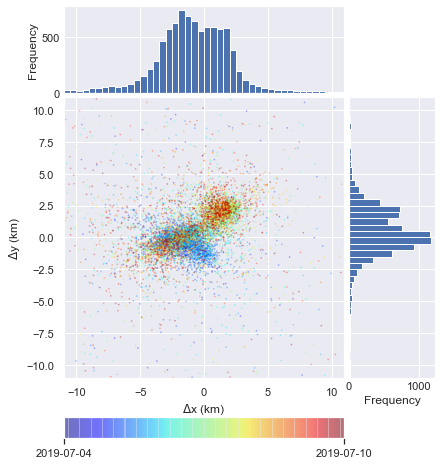

In [14]:
x = err_xyz[:,0]
y = err_xyz[:,1]

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.01

rect_scatter = [left, bottom, width, height]
rect_colorbar = [left, bottom - 0.13 - spacing, width, 0.05]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# start with a rectangular Figure
plt.figure(figsize=(6, 6))

ax_scatter = plt.axes(rect_scatter)
ax_colorbar = plt.axes(rect_colorbar)

# ax_scatter.tick_params(direction='in', top=True, right=True)
ax_histx = plt.axes(rect_histx)
ax_histx.tick_params(direction='in', labelbottom=False)
ax_histy = plt.axes(rect_histy)
ax_histy.tick_params(direction='in', labelleft=False)

# the scatter plot:
sc = ax_scatter.scatter(x, y, s=0.5, c=t, cmap="jet", alpha=0.3, rasterized=True)
ax_scatter.set_xlabel("$\Delta$x (km)")
ax_scatter.set_ylabel("$\Delta$y (km)")

cbar = plt.colorbar(sc, cax=ax_colorbar, orientation="horizontal", ticks=[t[0],  t[-1]])
print([str(start_datetime), str(end_datetime)])
cbar.ax.set_xticklabels([dates[0], dates[-1]]) 

# now determine nice limits by hand:
# binwidth = 0.25
# lim = np.ceil(np.abs([x, y]).max() / binwidth) * binwidth
binwidth = 0.5
lim = 11
ax_scatter.set_xlim((-lim, lim))
ax_scatter.set_ylim((-lim, lim))

bins = np.arange(-lim, lim + binwidth, binwidth)
ax_histx.hist(x, bins=bins)
ax_histy.hist(y, bins=bins, orientation='horizontal')

ax_histx.set_xlim(ax_scatter.get_xlim())
ax_histy.set_ylim(ax_scatter.get_ylim())
ax_histx.set_ylabel("Frequency")
ax_histy.set_xlabel("Frequency")

plt.savefig(f"figures/error-xy-{dates[0]}-{dates[-1]}.png", bbox_inches="tight", dpi=300)
plt.savefig(f"figures/error-xy-{dates[0]}-{dates[-1]}.pdf", bbox_inches="tight", dpi=300)


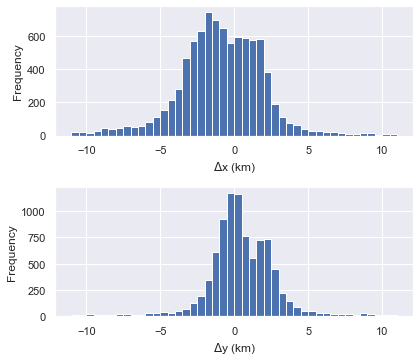

In [15]:

bins = np.arange(-lim, lim + binwidth, binwidth)
fig = plt.figure(figsize=plt.rcParams["figure.figsize"]*np.array([1.0,1.3]))
plt.subplot(211)
plt.hist(x, bins=bins)
plt.ylabel("Frequency")
plt.gca().set_xlabel([])
plt.xlabel("$\Delta$x (km)")
plt.subplot(212)
plt.hist(y, bins=bins)
plt.ylabel("Frequency")
plt.xlabel("$\Delta$y (km)")
plt.tight_layout()
plt.savefig(f"figures/error-xy-{dates[0]}-{dates[-1]}.png", bbox_inches="tight", dpi=300)
plt.savefig(f"figures/error-xy-{dates[0]}-{dates[-1]}.pdf", bbox_inches="tight", dpi=300)

In [16]:
idx = (np.abs(err_xyz[:,0]) < 10) & (np.abs(err_xyz[:,1]) < 10)
print("Mean", np.mean(err_xyz[idx,0]), np.mean(err_xyz[idx,1]), np.mean(err_xyz[idx,2])/1000)
print("STD", np.std(err_xyz[idx,0]), np.std(err_xyz[idx,1]), np.std(err_xyz[idx,2])/1000)
print("MAE", np.mean(np.abs(err_xyz[idx,0])), np.mean(np.abs(err_xyz[idx,1])), np.mean(np.abs(err_xyz[idx,2]))/1000)

Mean -0.8545617211470791 0.4589304987851462 10.750189993042673
STD 2.6077657942024555 2.111165297311899 3.803372538549697
MAE 2.134975255515023 1.5335998953437908 10.750502658627084


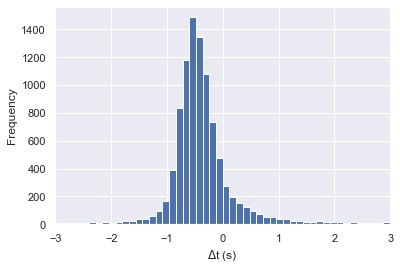

In [17]:
plt.figure()
plt.hist(err_time, range=(-3,3), bins=50)
plt.xlim([-3, 3])
plt.ylabel("Frequency")
plt.xlabel("$\Delta$t (s)")
plt.savefig(f"figures/error-t-{dates[0]}-{dates[-1]}.png", bbox_inches="tight", dpi=300)
plt.savefig(f"figures/error-t-{dates[0]}-{dates[-1]}.pdf", bbox_inches="tight", dpi=300)


In [18]:
idx = (np.abs(err_time) < 3)
print("Mean", np.mean(err_time))
print("STD", np.std(err_time))
print("MAE", np.mean(np.abs(err_time)))

Mean -0.358589068203893
STD 0.8025796444533159
MAE 0.6266436231271681


In [19]:
err_time, err_mag, t, mag = calc_time_mag_error(t_pred, mag_pred, t_scsn, mag_scsn, time_threshold)

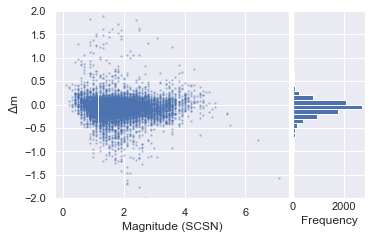

In [42]:
x = mag
y = err_mag

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.01

rect_scatter = [left, bottom, width, height]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# start with a rectangular Figure
plt.figure(figsize=(5, 4))

ax_scatter = plt.axes(rect_scatter)
# ax_colorbar = plt.axes(rect_colorbar)

# ax_scatter.tick_params(direction='in', top=True, right=True)
ax_histy = plt.axes(rect_histy)
ax_histy.tick_params(direction='in', labelleft=False)

# the scatter plot:
sc = ax_scatter.scatter(x, y, s=2, linewidths=1, alpha=0.3, rasterized=True)
ax_scatter.set_xlabel("Magnitude (SCSN)")
ax_scatter.set_ylabel("$\Delta$m")

# now determine nice limits by hand:
binwidth = 0.1
lim = 2
ax_scatter.set_ylim((-lim, lim))

bins = np.arange(-lim, lim + binwidth, binwidth)
ax_histy.hist(y, bins=bins, orientation='horizontal')

ax_histy.set_ylim(ax_scatter.get_ylim())
ax_histy.set_xlabel("Frequency")

plt.savefig(f"figures/error-mag-{dates[0]}-{dates[-1]}.png", bbox_inches="tight", dpi=300)
plt.savefig(f"figures/error-mag-{dates[0]}-{dates[-1]}.pdf", bbox_inches="tight", dpi=300)


In [21]:
idx = (np.abs(err_mag) < 2)
print("Mean", np.mean(err_mag))
print("STD", np.std(err_mag))
print("MAE", np.mean(np.abs(err_mag)))

Mean -0.0640668401874024
STD 0.23484066814711507
MAE 0.15373472149921913


In [22]:
# %% 
# compare with other catalog
time_threshold = 5
fp = open(f"performance-{dates[0]}-{dates[-1]}.txt", "w")
recall, precision, f1 = calc_detection_performance(t_pred, t_scsn, time_threshold)
print(f"Pred vs. SCSN : recall={recall:.3f}, precision={precision:.3f}, f1={f1:.3f}")
fp.write(f"Pred vs. SCSN : {len(t_pred)}, {len(t_scsn)}\n")
fp.write(f"Pred vs. SCSN : recall={recall:.3f}, precision={precision:.3f}, f1={f1:.3f}\n")
recall, precision, f1 = calc_detection_performance(t_pred, t_shelly2020, time_threshold)
print(f"Pred vs. Shelly (2020) : recall={recall:.3f}, precision={precision:.3f}, f1={f1:.3f}")
fp.write(f"Pred vs. Shelly (2020) : {len(t_pred)}, {len(t_shelly2020)}\n")
fp.write(f"Pred vs. Shelly (2020) : recall={recall:.3f}, precision={precision:.3f}, f1={f1:.3f}\n")
recall, precision, f1 = calc_detection_performance(t_pred, t_liu2020, time_threshold)
print(f"Pred vs. Ming (2020) : recall={recall:.3f}, precision={precision:.3f}, f1={f1:.3f}")
fp.write(f"Pred vs. Ming (2020) : {len(t_pred)}, {len(t_liu2020)}\n")
fp.write(f"Pred vs. Ming (2020) : recall={recall:.3f}, precision={precision:.3f}, f1={f1:.3f}\n")
recall, precision, f1 = calc_detection_performance(t_pred, t_ross2019, time_threshold)
print(f"Pred vs. Zachary (2019) : recall={recall:.3f}, precision={precision:.3f}, f1={f1:.3f}")
fp.write(f"Pred vs. Zachary (2019) : {len(t_pred)}, {len(t_ross2019)}\n")
fp.write(f"Pred vs. Zachary (2019) : recall={recall:.3f}, precision={precision:.3f}, f1={f1:.3f}\n")
fp.write(f"=======================================================\n")

Pred vs. SCSN : recall=0.973, precision=0.336, f1=0.499
Pred vs. Shelly (2020) : recall=0.955, precision=0.552, f1=0.699
Pred vs. Ming (2020) : recall=0.987, precision=0.576, f1=0.727
Pred vs. Zachary (2019) : recall=0.737, precision=0.765, f1=0.751


56

In [23]:
picks = pd.read_csv("merged_picks.csv", sep="\t")

In [24]:
print(f"P-picks: {len(picks[(picks['type']=='p')])}")
print(f"S-picks: {len(picks[(picks['type']=='s')])}")
print(f"Associated P-picks: {len(picks[(picks['type']=='p') & (picks['event_idx']!=-1)])}")
print(f"Associated S-picks: {len(picks[(picks['type']=='s') & (picks['event_idx']!=-1)])}")
print(f"Unassociated P-picks: {len(picks[(picks['type']=='p')]) - len(picks[(picks['type']=='p') & (picks['event_idx']!=-1)])}")
print(f"Unassociated S-picks: {len(picks[(picks['type']=='s')]) - len(picks[(picks['type']=='s') & (picks['event_idx']!=-1)])}")

P-picks: 651994
S-picks: 686291
Associated P-picks: 598218
Associated S-picks: 633010
Unassociated P-picks: 53776
Unassociated S-picks: 53281


In [25]:
(picks["event_idx"]!=-1)

0          True
1          True
2          True
3          True
4          True
           ... 
1338280    True
1338281    True
1338282    True
1338283    True
1338284    True
Name: event_idx, Length: 1338285, dtype: bool

In [26]:
len(picks[(picks["type"]=="s") & (picks["event_idx"]!=-1)])

633010

In [27]:
len(picks[picks["event_idx"]==-1])

107057

In [28]:
picks[picks["event_idx"]==-1]

,id,timestamp,type,prob,amp,prob_gmma,event_idx,file_index
10,CI.DTP..HH,2019-07-04T00:00:45.520000,s,0.586722,4.495422e-07,-1.0,-1,0
11,CI.JRC2..HN,2019-07-04T00:01:03.420000,s,0.392641,8.206393e-07,-1.0,-1,0
12,CI.CCC..BH,2019-07-04T00:04:39.390000,s,0.392486,2.734438e-06,-1.0,-1,0
13,CI.CCC..BH,2019-07-04T00:06:44.540000,s,0.874934,2.112931e-06,-1.0,-1,0
14,CI.CCC..BH,2019-07-04T00:06:53.750000,s,0.523007,1.015641e-06,-1.0,-1,0
...,...,...,...,...,...,...,...,...
1338213,CI.CLC..BH,2019-07-09T23:59:25.284000,s,0.736826,2.751237e-07,-1.0,-1,23
1338214,CI.CLC..HH,2019-07-09T23:59:32.614000,p,0.319237,4.155995e-07,-1.0,-1,23
1338215,CI.CLC..BH,2019-07-09T23:59:35.024000,s,0.329072,3.295172e-07,-1.0,-1,23
1338216,CI.CLC..HH,2019-07-09T23:59:35.024000,s,0.879812,4.155995e-07,-1.0,-1,23


In [29]:
num = 0
for i in range(24):
    tmp = picks[picks["file_index"]==i]["event_idx"].max()
    num += tmp
    print(i, tmp)
print("total:", num)

0 1256
1 1321
2 1276
3 1403
4 1438
5 1432
6 1425
7 1382
8 1455
9 1368
10 1425
11 1440
12 1467
13 1459
14 1475
15 1410
16 1483
17 1564
18 1637
19 1669
20 1620
21 1538
22 1597
23 1474
total: 35014


In [30]:
np.max(picks[picks["file_index"]==0]["event_idx"])

1256

In [31]:
num

35014